In [2]:
# Histograms, Binnings, and Density

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [6]:
data = np.random.randn(2000)

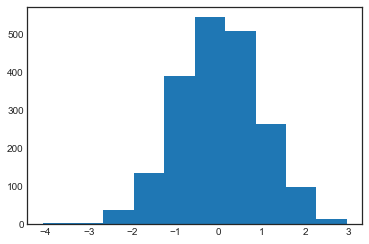

In [7]:
plt.hist(data);

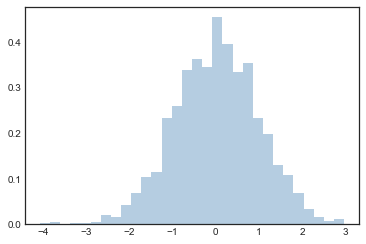

In [9]:
# customized:
plt.hist(data, bins=30, density=True, alpha=0.4,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


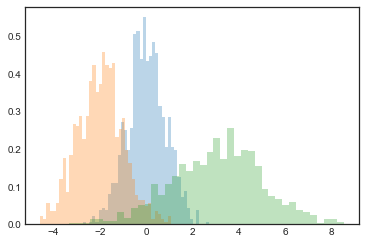

In [10]:
# Useful experience: 
# the combination of histtype='stepfilled' 
#  along with some transparency alpha  
#  when comparing histograms of several distributions:

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [14]:
# simply compute the histogram without display
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[  7 173 935 771 114]


In [15]:
# Two-Dimensional Histograms and Binnings

In [17]:
# define: an x and y array drawn from 
#  a multivariate Gaussian distribution:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

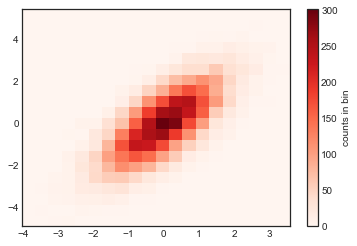

In [19]:
# square binning
plt.hist2d(x, y, bins=20, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

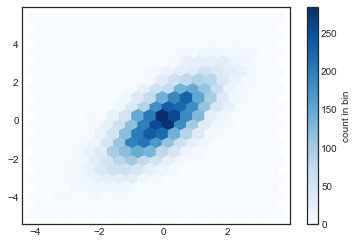

In [20]:
# hexagon binning
plt.hexbin(x, y, gridsize=20, cmap='Blues')
cb = plt.colorbar(label='count in bin')

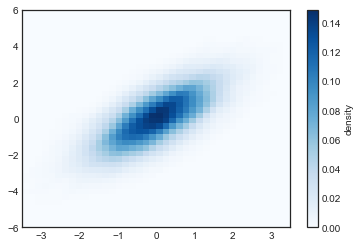

In [21]:
# Kernel density estimation (KDE)

from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

In [22]:
# Three-Dimensional Plotting in Matplotlib

In [23]:
from mpl_toolkits import mplot3d

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

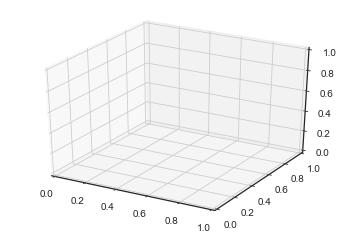

In [28]:
# the keyword projection='3d' creates a 3-D plot:
fig = plt.figure()
ax = plt.axes(projection='3d')

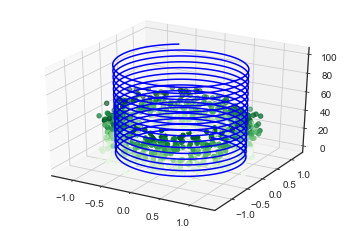

In [34]:
# Three-dimensional Points and Lines
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 100, 5000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'blue')

# Data for three-dimensional scattered points
zdata = 50 * np.random.random(1000)
xdata = np.sin(zdata) + 0.1 * np.random.randn(1000)
ydata = np.cos(zdata) + 0.1 * np.random.randn(1000)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [37]:
# Three-dimensional Contour Plots
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

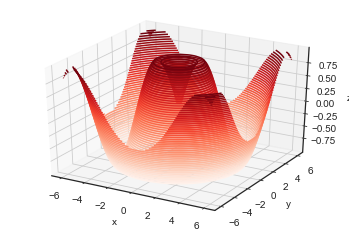

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='Reds')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

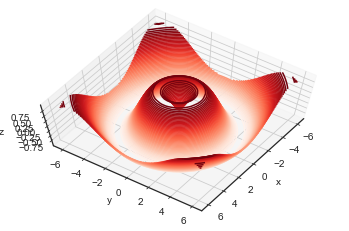

In [41]:
# an elevation of 60 degrees 
#   (that is, 60 degrees above the x-y plane) 
# an azimuth of 35 degrees 
#   (that is, rotated 35 degrees counter-clockwise about the z-axis)
ax.view_init(70, 35)
fig

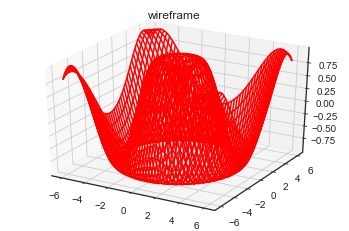

In [42]:
# wireframes
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='red')
ax.set_title('wireframe');

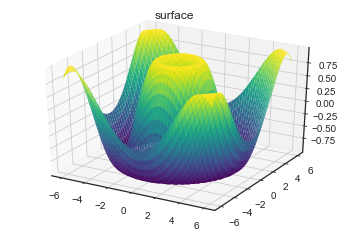

In [43]:
# surface plot with adding a colormap
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

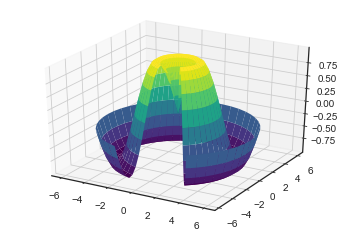

In [44]:
# slicing
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

In [45]:
# Surface Triangulations

In [49]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)
theta

array([4.26280668e+00, 4.57386936e+00, 5.61842431e+00, 4.44525424e+00,
       3.36453013e-01, 3.80219561e+00, 2.70478769e-01, 5.46592257e+00,
       1.37218636e+00, 5.77190516e-01, 9.90879006e-01, 5.95872145e+00,
       4.00065406e+00, 3.35581738e+00, 2.96466416e+00, 3.49497662e+00,
       3.21519082e+00, 4.21568436e+00, 5.80656346e+00, 3.75313128e+00,
       4.99295582e+00, 5.78756183e+00, 5.78432880e+00, 5.25682879e+00,
       3.01140069e+00, 3.82870516e+00, 1.82830810e+00, 8.52931145e-01,
       4.77683585e+00, 2.88890079e-01, 5.45786527e+00, 4.22636357e-02,
       4.45611527e+00, 5.80795917e+00, 5.10191386e+00, 4.66040463e+00,
       5.79130114e+00, 3.52648372e+00, 6.14129643e+00, 5.96124719e+00,
       2.39575316e+00, 4.09376321e+00, 2.11127317e+00, 3.35506507e+00,
       2.23428321e-01, 4.73714555e+00, 5.14958208e+00, 2.95202109e+00,
       1.99739562e-01, 5.99210033e+00, 4.33704456e+00, 4.71304622e+00,
       4.92886100e+00, 4.28936535e+00, 2.94171824e+00, 5.55511583e+00,
      

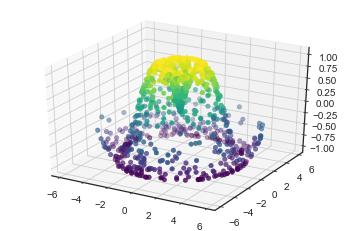

In [50]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

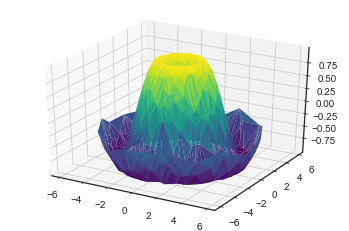

In [51]:
#
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

In [52]:
ax.plot_trisurf?

In [53]:
# Example: Visualizing a MÃ¶bius strip

In [54]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [55]:
phi = 0.5 * theta

In [56]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

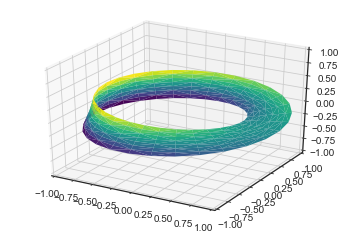

In [57]:
#  triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);